### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('popular')
import string
from nltk.corpus import stopwords
import joblib
from sklearn.linear_model import LogisticRegression,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline   
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users

### **Downloading dataset**

In [9]:
import csv
from tqdm import tqdm


with open('dataset.txt') as file:
    data = file.readlines()
    

with open('data.csv', 'w', newline= '') as csvfile:
    filenames = ['source_txt', 'plagiarism_txt', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=filenames)
    
    writer.writeheader()
    for line in tqdm(data):
        parts = line.strip().split('\t')
        source_txt = parts[0]
        plagiarishm_txt = parts[1]
        label = int(parts[2])
        
        writer.writerow({
            'source_txt' : source_txt,
            'plagiarism_txt' : plagiarishm_txt,
            'label' : label
        })
print('CSV file created successfully...')

100%|██████████| 367373/367373 [00:04<00:00, 88900.19it/s] 

CSV file created successfully...


In [10]:
df = pd.read_csv("data.csv")
df.sample(5)

,source_txt,plagiarism_txt,label
223574,A young girl makes her way onto red recreation...,a boy on a playground,0
89847,A white guy wearing a wetsuit is water-skiing.,A man is skiing down the mountain.,0
282137,The race car drivers just won a race and are p...,The race car driver knows how to drive,1
129049,A man with an orange cap scraping concrete.,A person in cap working in construction site,1
247682,A man is videotaping something.,The camera is firing a beam of deadly light.,0


In [11]:
df.shape

(367373, 3)

### **Data Cleaning**

In [12]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

source_txt        0
plagiarism_txt    0
label             0
dtype: int64

In [13]:
df.head()

,source_txt,plagiarism_txt,label
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
2,Children smiling and waving at camera,There are children present,1
3,Children smiling and waving at camera,The kids are frowning,0
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0


In [14]:
print("Duplicates : ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates : ",df.duplicated().sum())

Duplicates :  454
Duplicates :  0


label
0    183874
1    183041
Name: count, dtype: int64


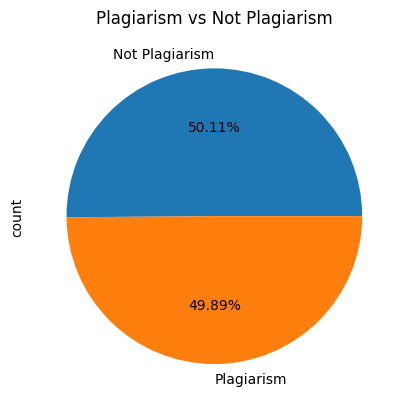

In [15]:
print(df['label'].value_counts())
df['label'].value_counts().plot.pie(autopct="%1.2f%%",labels=['Not Plagiarism','Plagiarism'])
plt.title("Plagiarism vs Not Plagiarism")
plt.show()

In [16]:
df['source_len']=df['source_txt'].apply(lambda x: len(x.split()))
df['plagiarism_len']=df['plagiarism_txt'].apply(lambda x: len(x.split()))
df.head()

,source_txt,plagiarism_txt,label,source_len,plagiarism_len
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0,11,9
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1,11,7
2,Children smiling and waving at camera,There are children present,1,6,4
3,Children smiling and waving at camera,The kids are frowning,0,6,4
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0,13,6


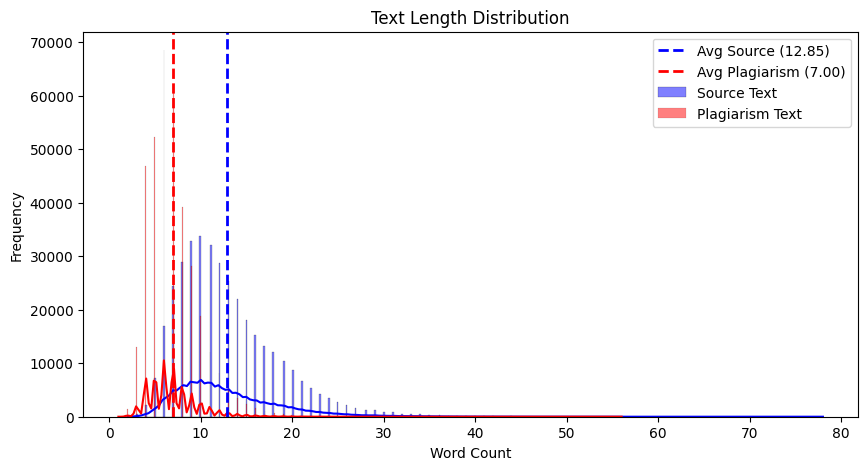

In [17]:
# Plot histograms
plt.figure(figsize=(10, 5))
sns.histplot(df['source_len'], color='blue', label='Source Text', kde=True)
sns.histplot(df['plagiarism_len'], color='red', label='Plagiarism Text', kde=True)
avg_source_len=df['source_len'].mean()
avg_plagiarism_len=df['plagiarism_len'].mean()
plt.axvline(avg_source_len, color='blue', linestyle='dashed', linewidth=2, label=f'Avg Source ({avg_source_len:.2f})')
plt.axvline(avg_plagiarism_len, color='red', linestyle='dashed', linewidth=2, label=f'Avg Plagiarism ({avg_plagiarism_len:.2f})')
plt.title('Text Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


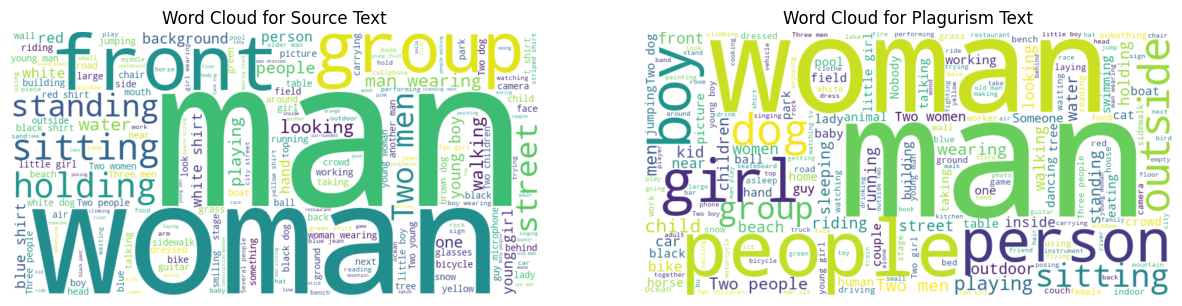

In [18]:
from wordcloud import WordCloud

source_text=" ".join(df['source_txt'].tolist())
wordcloud_source = WordCloud(width=800, height=400, background_color='white').generate(source_text)

plagiarishm_text=" ".join(df['plagiarism_txt'].tolist())
wordcloud_plagiarism = WordCloud(width=800, height=400, background_color='white').generate(plagiarishm_text)
plt.figure(figsize=(15, 7)) 
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_source, interpolation='bilinear')      
plt.title('Word Cloud for Source Text')
plt.axis('off') 

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_plagiarism, interpolation='bilinear')  
plt.title('Word Cloud for Plagurism Text')
plt.axis('off') 

plt.show()

In [19]:
%pip install spacy
!python -m spacy download en_core_web_sm

import spacy

### **Importing Libraries**
# ========== NLTK Downloads ==========
nltk.download('stopwords')

# ========== Load SpaCy Model for Advanced NLP Tasks ==========
nlp = spacy.load('en_core_web_sm')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 252.2 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 327.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 448.2 kB/s eta 0:00:29
     --------------------------------------- 0.1/12.8 MB 448.2 kB/s eta 0:00:29
     --------------------------------------- 0.1/12.8 MB 448.2 kB/s eta 0:00:29
     --------------------------------------- 0.1/12.8 MB 448.2 kB/s eta 0:00:29
     --------------------------------------- 0.1/12.8 MB 448.2 kB/s eta 0:00:29
      -------------------------------------- 0.2/12.8 MB 471.0 kB/s eta 0:00:27



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:

def lower_case(text):
    return text.lower()

In [21]:
import re
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)

In [22]:
special_character_list=[ '@', '#', '$', '%', '^', '&', '*', '+', '=', '<', '>', '/', '\\', '|', '`', '~']
def remove_special_characters(text):
    return ''.join([char for char in text if char not in special_character_list])

In [23]:
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)


In [24]:

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F700-\U0001F77F" 
                               u"\U0001F780-\U0001F7FF" 
                               u"\U0001F800-\U0001F8FF" 
                               u"\U0001F900-\U0001F9FF" 
                               u"\U0001FA00-\U0001FA6F" 
                               u"\U0001FA70-\U0001FAFF" 
                               u"\U00002702-\U000027B0" 
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [25]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)


In [26]:
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()


In [27]:
%pip install contractions
import contractions
def expand_contractions(text):
    return contractions.fix(text)


  Using cached contractions-0.1.73-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached anyascii-0.3.3-py3-none-any.whl.metadata (1.6 kB)
Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
Using cached anyascii-0.3.3-py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()
    return " ".join([word for word in tokens if word not in stop_words])

In [29]:
def spacy_tokenization_lemmatization(text):
   doc=nlp(text)
   return [token.lemma_ for token in doc]

In [30]:
def remove_specific_words(text, words_to_remove):
    words = text.split()
    filtered_words=[word for word in words if word not in  words_to_remove]
    return " ".join(filtered_words)


In [31]:
def full_pipeline(text):
    text = lower_case(text)
    text = expand_contractions(text)
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_html_tags(text)
    text = remove_emojis(text)
    text = remove_urls(text)
    text = remove_extra_spaces(text)
    text = remove_stopwords(text)
    tokens = spacy_tokenization_lemmatization(text)
    text = " ".join(tokens)
    text = remove_specific_words(text, ['chat'])  # Remove 'chat' specifically
    return text

In [32]:
tqdm.pandas() # to track progress
df['cleaned_source_txt'] = df['source_txt'].progress_apply(full_pipeline)


100%|██████████| 366915/366915 [33:45<00:00, 181.14it/s]


In [33]:
df['cleaned_plagiarism_txt'] = df['plagiarism_txt'].progress_apply(full_pipeline)

100%|██████████| 366915/366915 [24:20<00:00, 251.31it/s]


In [34]:
print("\n\n========= Final DataFrame =========\n")
print(df[['cleaned_source_txt', 'cleaned_plagiarism_txt']])



========= Final DataFrame =========

                            cleaned_source_txt  \
0             person horse jump break airplane   
1             person horse jump break airplane   
2                      child smile wave camera   
3                      child smile wave camera   
4        boy jump skateboard middle red bridge   
...                                        ...   
367368       dog blue collar play ball outside   
367369             four dirty barefooted child   
367370             four dirty barefooted child   
367371  man surf bodysuit beautiful blue water   
367372  man surf bodysuit beautiful blue water   

                        cleaned_plagiarism_txt  
0                  person diner order omelette  
1                        person outdoors horse  
2                                child present  
3                                    kid frown  
4                           boy skate sidewalk  
...                                        ...  
367368           

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
%pip install gensim
import gensim
from gensim.models import Word2Vec

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
def tokenize_text(text):
    return text.split()

In [37]:
source_sentences = df['cleaned_source_txt'].apply(tokenize_text).tolist()
plagiarism_sentences = df['cleaned_plagiarism_txt'].apply(tokenize_text).tolist()

In [38]:
all_sentence=source_sentences + plagiarism_sentences

In [39]:
# ========== Train Word2Vec Model ==========
w2v_model = Word2Vec(sentences=all_sentence, vector_size=100, window=5, min_count=1, workers=4)


In [43]:
def sentence_to_vec(sentence,model):
    
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    sentence_vector = np.mean(word_vectors, axis=0)
    return sentence_vector

In [45]:
# convert to vector
source_vec=df['cleaned_source_txt'].apply(lambda x: sentence_to_vec(tokenize_text(x),w2v_model))
plagiarism_vec=df['cleaned_plagiarism_txt'].apply(lambda x: sentence_to_vec(tokenize_text(x),w2v_model))

In [47]:
# ========== Display Result ==========
df['source_vec'] = source_vec
df['plagiarism_vec'] = plagiarism_vec
print("\n\n========= Final DataFrame =========\n")
print(df[['cleaned_source_txt', 'source_vec', 'cleaned_plagiarism_txt', 'plagiarism_vec']])



========= Final DataFrame =========

                            cleaned_source_txt  \
0             person horse jump break airplane   
1             person horse jump break airplane   
2                      child smile wave camera   
3                      child smile wave camera   
4        boy jump skateboard middle red bridge   
...                                        ...   
367368       dog blue collar play ball outside   
367369             four dirty barefooted child   
367370             four dirty barefooted child   
367371  man surf bodysuit beautiful blue water   
367372  man surf bodysuit beautiful blue water   

                                               source_vec  \
0       [-0.7314271, -0.3757844, 0.6169542, 0.10908816...   
1       [-0.7314271, -0.3757844, 0.6169542, 0.10908816...   
2       [-0.5981137, -0.60782313, -0.7215874, 0.708237...   
3       [-0.5981137, -0.60782313, -0.7215874, 0.708237...   
4       [-0.51852375, -1.2029341, 0.033355534, -0.4141.

In [48]:
df.head()

,source_txt,plagiarism_txt,label,source_len,plagiarism_len,cleaned_source_txt,cleaned_plagiarism_txt,source_vec,plagiarism_vec
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0,11,9,person horse jump break airplane,person diner order omelette,"[-0.7314271, -0.3757844, 0.6169542, 0.10908816...","[-0.20088297, 0.058411464, 0.70703435, 0.07651..."
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1,11,7,person horse jump break airplane,person outdoors horse,"[-0.7314271, -0.3757844, 0.6169542, 0.10908816...","[-0.53456205, -1.1006323, 0.9395473, 0.6021177..."
2,Children smiling and waving at camera,There are children present,1,6,4,child smile wave camera,child present,"[-0.5981137, -0.60782313, -0.7215874, 0.708237...","[-0.43488026, 0.1429862, -0.4357366, 1.09858, ..."
3,Children smiling and waving at camera,The kids are frowning,0,6,4,child smile wave camera,kid frown,"[-0.5981137, -0.60782313, -0.7215874, 0.708237...","[-0.5261146, 0.72351015, -0.0045668036, 0.8904..."
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0,13,6,boy jump skateboard middle red bridge,boy skate sidewalk,"[-0.51852375, -1.2029341, 0.033355534, -0.4141...","[-0.4007651, -1.0063258, 1.3797213, 0.99225116..."


#### **Model Training**

In [52]:
X = np.vstack([np.hstack([src_vec, plag_vec]) for src_vec, plag_vec in zip(df['source_vec'], df['plagiarism_vec'])])
Y=df['label'].values
# Splitting dataset into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# Training
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train) 

# Prediction
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)


print("\n\n========= Model Evaluation =========\n")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)



========= Model Evaluation =========

Accuracy: 74.74%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75     36775
           1       0.75      0.74      0.74     36608

    accuracy                           0.75     73383
   macro avg       0.75      0.75      0.75     73383
weighted avg       0.75      0.75      0.75     73383



#### **Neural Network**

In [54]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt


#### **Hyper parameter Tuning**

In [61]:
X = np.vstack([np.hstack([src_vec, plag_vec]) for src_vec, plag_vec in zip(df['source_vec'], df['plagiarism_vec'])])
Y=df['label'].values


In [62]:
print(X.shape)
# LSTM requires 3D input: (samples, timesteps, features)
X=X.reshape([X.shape[0],1,X.shape[1]])
print(X)

(366915, 200)
[[[-0.73142707 -0.3757844   0.61695421 ... -0.33588028  0.01087857
    0.1184424 ]]

 [[-0.73142707 -0.3757844   0.61695421 ... -0.22824316  0.30529317
    1.22694504]]

 [[-0.59811372 -0.60782313 -0.72158742 ... -0.42107099  0.98537928
    0.72849035]]

 ...

 [[-0.58605313  0.03389821  0.40796709 ... -1.11242092  0.77389872
    0.12380068]]

 [[ 0.21787262 -0.84229118  0.01596214 ... -0.33769286 -0.4758558
    0.18447332]]

 [[ 0.21787262 -0.84229118  0.01596214 ... -0.54902536  0.18322426
    0.75341731]]]


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [70]:
# To overfitting (it stops training automatically when model stops improving)
early_stopping = EarlyStopping(
    monitor='val_loss',   
    patience=3,          
    restore_best_weights=True,
    mode='min'            
)

In [66]:
def build_model(hp):
    model = Sequential()
    
    # Only tune number of units in LSTM
    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.3))
    
    # Dense layer with tuning
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # model config
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [67]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='keras_tuner',
    project_name='lstm_tuning_simple'
)

In [71]:
# model train
tuner.search(X_train, Y_train, epochs=10, batch_size=32,
             validation_data=(X_test, Y_test),
             callbacks=[early_stopping])


Trial 26 Complete [00h 04m 19s]
val_accuracy: 0.8014935255050659

Best val_accuracy So Far: 0.840031087398529
Total elapsed time: 00h 53m 51s


In [75]:
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print(f"\n\nBest Hyperparameters: \n{best_hyperparameters.values}")




Best Hyperparameters: 
{'lstm_units': 64, 'dense_units': 64, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0018'}


In [77]:
best_model = tuner.get_best_models(num_models=1)[0]

In [78]:
# Train further
history = best_model.fit(X_train, Y_train, epochs=30, batch_size=32,
                         validation_data=(X_test, Y_test),
                         callbacks=[early_stopping])


Epoch 1/30
9173/9173 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8473 - loss: 0.3403 - val_accuracy: 0.8408 - val_loss: 0.3529
Epoch 2/30
9173/9173 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8481 - loss: 0.3374 - val_accuracy: 0.8420 - val_loss: 0.3514
Epoch 3/30
9173/9173 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8498 - loss: 0.3354 - val_accuracy: 0.8401 - val_loss: 0.3530
Epoch 4/30
9173/9173 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8508 - loss: 0.3328 - val_accuracy: 0.8425 - val_loss: 0.3512
Epoch 5/30
9173/9173 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8527 - loss: 0.3290 - val_accuracy: 0.8412 - val_loss: 0.3517
Epoch 6/30
9173/9173 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8539 - loss: 0.3271 - val_accuracy: 0.8429 - val_loss: 0.3516
Epoch 7/30
9173/9173 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8542 - loss: 0.3261 - val_accuracy: 0.8417 - val_loss: 0.3514


In [79]:
loss, accuracy = best_model.evaluate(X_test, Y_test)
print(f"\nBest Model Accuracy: {accuracy*100:.2f}%")

# Predictions
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

2294/2294 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8425 - loss: 0.3512

Best Model Accuracy: 84.25%
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 2s 677us/step

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84     36775
           1       0.82      0.88      0.85     36608

    accuracy                           0.84     73383
   macro avg       0.84      0.84      0.84     73383
weighted avg       0.84      0.84      0.84     73383



#### **Plotting**

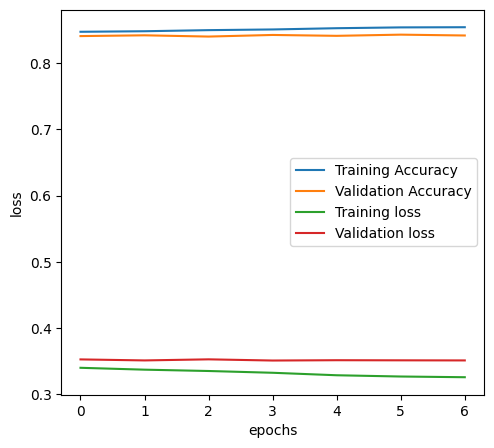

In [80]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

#### **Save the model**

In [81]:
import pickle
pickle.dump(best_model,open('best_model.pkl','wb'))
import pickle

#Save the complete Word2Vec model
pickle.dump(w2v_model, open('word2vec_model.pkl', 'wb'))